In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## import processed LMDZ data ##

## import alpha (albedo) data

alpha_list = np.load('./LMDZ_processed/alpha/alpha_grey_alphalist.npy')

alpha_lag = np.load('./LMDZ_processed/alpha/alpha_grey_lag.npy')
alpha_amp = np.load('./LMDZ_processed/alpha/alpha_grey_amp.npy')
alpha_im_q = np.load('./LMDZ_processed/alpha/alpha_grey_im_q.npy')


## import S data ## 

S_list = np.load('./LMDZ_processed/S/S_grey_alphalist.npy')
S_lag = np.load('./LMDZ_processed/S/S_grey_lag.npy')
S_amp = np.load('./LMDZ_processed/S/S_grey_amp.npy')
S_im_q = np.load('./LMDZ_processed/S/S_grey_im_q.npy')


## combine S and alpha (to get ASR) #

S_alpha_list = (1-alpha_list)*1137 # ASR
S_S_list = 0.8*S_list # ASR, alpha = 0.2

ASR_list = np.concatenate([S_alpha_list, S_S_list])
ASR_sort = np.argsort(ASR_list)
ASR_list = ASR_list[ASR_sort]
ASR_imq = np.concatenate([alpha_im_q, S_im_q])[ASR_sort]
ASR_lag = np.concatenate([alpha_lag, S_lag])[ASR_sort]
ASR_amp = np.concatenate([alpha_amp, S_amp])[ASR_sort]


## import tau_lw data

taulw_list = np.load('./LMDZ_processed/tau_lw/taulw_grey_taulwlist.npy')
taulw_lag = np.load('./LMDZ_processed/tau_lw/taulw_grey_lag.npy')
taulw_amp = np.load('./LMDZ_processed/tau_lw/taulw_grey_amp.npy')
taulw_im_q = np.load('./LMDZ_processed/tau_lw/taulw_grey_im_q.npy')



## import tau_sw data

tausw_list = np.load('./LMDZ_processed/tau_sw/tausw_grey_tausw_list.npy')
tausw_lag = np.load('./LMDZ_processed/tau_sw/tausw_grey_lag.npy')
tausw_amp = np.load('./LMDZ_processed/tau_sw/tausw_grey_amp.npy')
tausw_im_q = np.load('./LMDZ_processed/tau_sw/tausw_grey_im_q.npy')

## import ps data

# no rayleigh scattering

ps_list = np.load('./LMDZ_processed/ps_noray/ps_grey_pslist.npy')
ps_lag = np.load('./LMDZ_processed/ps_noray/ps_grey_lag.npy')
ps_amp = np.load('./LMDZ_processed/ps_noray/ps_grey_amp.npy')
ps_im_q = np.load('./LMDZ_processed/ps_noray/ps_grey_im_q.npy')

# including rayleigh scattering

ps_ray_list = np.load('./LMDZ_processed/ps/ps_list.npy')
ps_ray_lag = np.load('./LMDZ_processed/ps/ps_lag.npy')
ps_ray_amp = np.load('./LMDZ_processed/ps/ps_amp.npy')
ps_ray_im_q = np.load('./LMDZ_processed/ps/ps_im_q.npy')

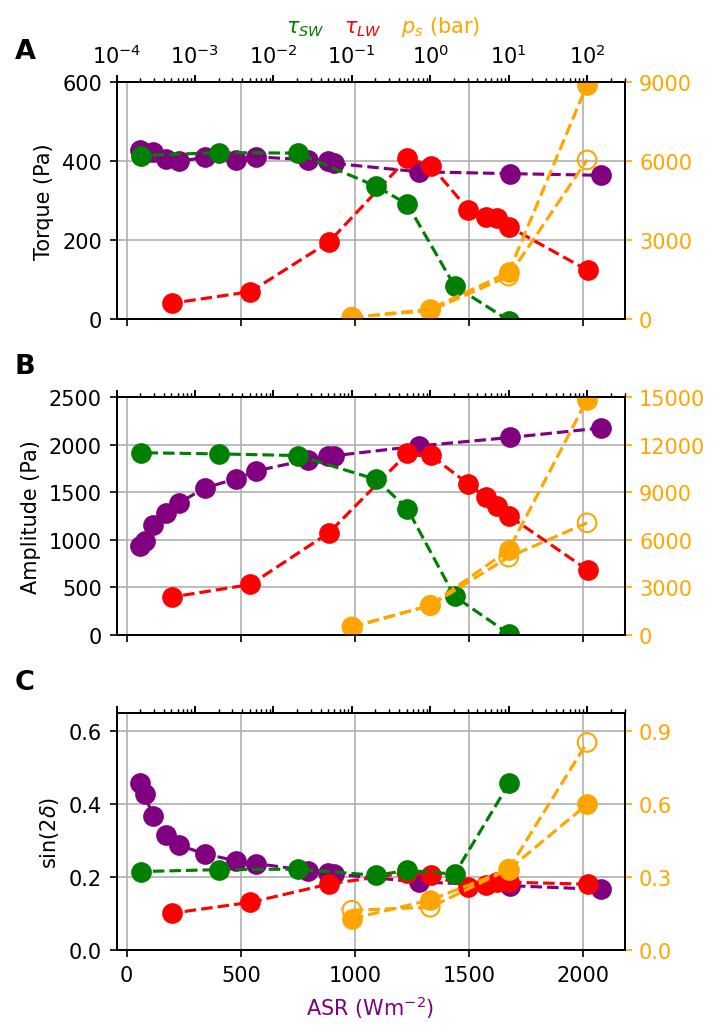

In [4]:
fig, ax = plt.subplots(3,1, dpi =150, figsize = (5,7),tight_layout = True)

ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[2].set_axisbelow(True)
ax[0].grid()
ax[0].scatter(ASR_list, ASR_imq, color = 'purple', s =80)
ax[0].plot(ASR_list, ASR_imq, color='purple',linestyle='--')


ax2 = ax[0].twiny()

ax2.scatter(taulw_list, taulw_im_q, color = 'r', s = 80)
ax2.plot(taulw_list, taulw_im_q, 'r--')

ax2.set_xscale('log')

ax2.set_xlim(1e-4, 300)

ax[0].tick_params(labelbottom=False)

ax3 = ax[0].twiny()
ax3.tick_params(labeltop=False)

ax3.scatter(tausw_list, tausw_im_q, color = 'g', s = 80)
ax2.plot(tausw_list, tausw_im_q, 'g--')

ax3.set_xscale('log')
ax2.set_xticks([1e-4,1e-3, 1e-2, 1e-1, 1, 10,100])
ax3.set_xlim(1e-4, 300)

ax1ps = ax3.twinx()
ax1ps.scatter(ps_list, ps_im_q, color = 'orange', s =80)
ax1ps.plot(ps_list, ps_im_q, color='orange',linestyle='--')

ax1ps.scatter(ps_list, ps_ray_im_q, facecolor = 'none',edgecolor = 'orange', s =80)
ax1ps.plot(ps_list, ps_ray_im_q, color='orange',linestyle='--')




ax[0].set_ylabel('Torque (Pa)')

ax[1].grid()
ax[1].scatter(ASR_list, ASR_amp, color = 'purple', s =80)
ax[1].plot(ASR_list, ASR_amp, color='purple',linestyle='--')
ax[1].tick_params(labelbottom=False)


ax4 = ax[1].twiny()

ax4.scatter(taulw_list, taulw_amp, color = 'r', s = 80)
ax4.plot(taulw_list, taulw_amp, 'r--')

ax4.set_xscale('log')
ax5 = ax[1].twiny()

ax5.scatter(tausw_list, tausw_amp, color = 'g', s = 80)
ax5.plot(tausw_list, tausw_amp, 'g--')
ax5.set_xscale('log')
ax4.tick_params(labeltop=False)
ax5.tick_params(labeltop=False)

ax4.set_xlim(1e-4,300)
ax5.set_xlim(1e-4,300)

ax2ps = ax5.twinx()
ax2ps.scatter(ps_list, ps_amp, color = 'orange', s =80)
ax2ps.plot(ps_list, ps_amp, color='orange',linestyle='--')

ax2ps.scatter(ps_list, ps_ray_amp, facecolor = 'none',edgecolor = 'orange', s =80)
ax2ps.plot(ps_list, ps_ray_amp, color='orange',linestyle='--')

ax2ps.set_ylim(-200,16000)



ax[1].set_ylabel('Amplitude (Pa)')
ax[1].tick_params(labeltop=False)

ax[2].grid()
ax[2].scatter(ASR_list, ASR_lag, color = 'purple', s =80)
ax[2].plot(ASR_list, ASR_lag, color='purple',linestyle='--')

ax[2].set_xlabel('ASR (Wm$^{-2}$)', color='purple')

ax6 = ax[2].twiny()

ax6.scatter(taulw_list, taulw_lag, color = 'r', s = 80)
ax6.plot(taulw_list, taulw_lag, 'r--')
ax6.set_xscale('log')

ax7 = ax[2].twiny()

ax6.set_xlim(1e-4,300)
ax7.set_xlim(1e-4,300)

ax7.scatter(tausw_list, np.absolute(tausw_lag), color = 'g', s = 80)
ax6.plot(tausw_list, np.absolute(tausw_lag), 'g--')
ax7.set_xscale('log')
ax6.tick_params(labeltop=False)
ax7.tick_params(labeltop=False)

ax3ps = ax7.twinx()
ax3ps.scatter(ps_list, ps_lag, color = 'orange', s =80)
ax3ps.plot(ps_list, ps_lag, color='orange',linestyle='--')

ax3ps.scatter(ps_list, ps_ray_lag, facecolor = 'none',edgecolor = 'orange', s =80)
ax3ps.plot(ps_list, ps_ray_lag, color='orange',linestyle='--')
ax3ps.set_ylim(0,1)


ax[0].set_ylim(0,600)
ax[1].set_ylim(0,2500)
ax[2].set_ylim(0,0.65)
ax[2].set_ylabel('sin(2$\delta$)')



## limits and ticks #

ax1ps.set_ylim(0,9000)
ax1ps.set_yticks([0, 3000, 6000, 9000])

ax2ps.set_ylim(0,15000)
ax2ps.set_yticks([0, 3000,6000, 9000, 12000, 15000])


ax[0].text(-0.2, 1.1, 'A', transform=ax[0].transAxes, size=13, weight='bold')
ax[1].text(-0.2, 1.1, 'B', transform=ax[1].transAxes, size=13, weight='bold')
ax[2].text(-0.2, 1.1, 'C', transform=ax[2].transAxes, size=13, weight='bold')

ax[0].text(700,725,'$\\tau_{SW}$', fontsize = 10, color = 'g')
ax[0].text(950,725,'$\\tau_{LW}$', fontsize = 10, color = 'r')
ax[0].text(1200,725,'$p_s$ (bar)', fontsize = 10, color = 'orange')

ax1ps.tick_params(axis = 'y',colors='orange')
ax1ps.yaxis.label.set_color('orange')

ax2ps.tick_params(axis = 'y',colors='orange')
ax2ps.yaxis.label.set_color('orange')



ax3ps.tick_params(axis = 'y',colors='orange')
ax3ps.yaxis.label.set_color('orange')
ax3ps.set_ylim(0,0.975)
ax3ps.set_yticks([0,0.3,0.6,0.9]);

#plt.savefig('./Paper Plots/SW_2023_Figure2.pdf', bbox_inches = 'tight')